### (0 баллов) Считываем данные

In [153]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [154]:
from sklearn.datasets import load_boston

dataset = load_boston()
dataset.keys()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

Каждая квартира имеет 13 признаков:

In [155]:
X = dataset['data']
X[:10]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00],
       [2.9850e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.4300e+00, 5.8700e

In [156]:
dataset['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [157]:
print(dataset['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Хочется научиться предсказывать функцию цены квартиры. Предположительно, она зависит как-то от этих признаков.

In [158]:
y = dataset['target']
y[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

### (1 балл) Разделите данные на тренировочную и тестовую части.

Тестовая часть должна составлять 10% выборки.


In [159]:
from sklearn.model_selection import train_test_split

# фиксирую random_state, чтобы результаты воспроизвелись при проверке
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,
                                                    random_state=42)

### (1 балл) Обучение и применение модели
Обучите модель линейной регрессии на тренировочной части и предскажите результаты на тестовой части.



In [160]:
from sklearn.linear_model import LinearRegression


model = LinearRegression()
model = model.fit(X_train, y_train)

In [161]:
y_pred = model.predict(X_test)

### (2 балл) Валидация результата

Напишите свою функцию MSE, убедитесь, что она совпадает с реализацией из sklearn и посчитайте своей результат на тестовой части.

In [162]:
from sklearn.metrics import mean_squared_error
def MSE(y_real, y_pred):
    return ((y_real - y_pred) ** 2).mean()

In [163]:
print(f'MSE (sklearn): {mean_squared_error(y_test, y_pred)}')
print(f'MSE (defined): {MSE(y_test, y_pred)}')

MSE (sklearn): 14.995852876582541
MSE (defined): 14.995852876582541


In [164]:
# сохраним на попозже
no_l2_result = MSE(y_test, y_pred)

Насколько хорошо вы предсказали цену? Сравните с наивным алгоритмом (предсказать среднюю цену на тренировочной части вне зависимости от признаков).

In [165]:
def super_puper_estimator(y_train):
    return y_train.mean()

In [166]:
y_cringe = super_puper_estimator(y_train)
print(f'avg linreg fan: {MSE(y_test, y_pred)}')
print(f'avg mean target enjoyer: {MSE(y_cringe, y_test)}')

avg linreg fan: 14.995852876582541
avg mean target enjoyer: 65.00802631111615


### (2 балла) Улучшите результат.

Возможно, происходит переобучение, попробуйте применить регуляризацию, чтобы улучшить результат (то есть используйте Ridge вместо LinearRegression).

Нарисуйте график зависимости MSE от коэффициента регуляризации.

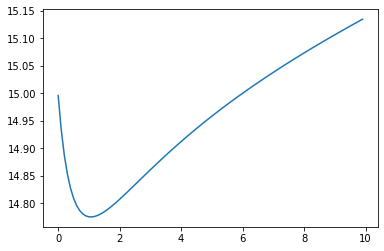

In [169]:
from sklearn.linear_model import Ridge


lambda_errors = list()
lambdas = np.arange(0, 10, 0.1)
minimal_error = 999999999999
optimal_lambda = 0

for lambda_value in lambdas:
    trial_model = Ridge(alpha=lambda_value)
    trial_model = trial_model.fit(X_train, y_train)
    y_pred = trial_model.predict(X_test)
    error = MSE(y_pred, y_test)
    lambda_errors.append(error)
    if minimal_error > error:
        minimal_error = error
        optimal_lambda = lambda_value

plt.plot(lambdas, lambda_errors)
plt.show()

Помогает ли регуляризация? Какой коэффициент регуляризации надо выбрать, чтобы ошибка была минимальной? Чему при этом равна ошибка? Напишите выводы о проведенных экспериментах

In [170]:
print(f'Оптимальный коэффициент: {optimal_lambda}')
print(f'Минимум ошибки: {minimal_error}')
print(f'Разница с LinearRegression: {no_l2_result - minimal_error}')

Оптимальный коэффициент: 1.1
Минимум ошибки: 14.775296466176151
Разница с LinearRegression: 0.22055641040638996


Регуляризация не очень сильно помогла **в данном случае**: средний квадрат ошибки упал на 0.22 в сравнении с моделью без регуляризации. Тем не менее, если не фиксировать random_state, можно от испытания к испытанию в зависимости от случайного разбиения на трейн и тест видеть разные ситуации: где-то изначально небольшой квадрат ошибки почти не уменьшается, а где-то он изначально большой, но сильно падает при применении огромного коэффициента (в одном из испытаний был 318). Отсюда видно, что от разбиения данных зависит и подверженность переобучению.